<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [4]:
#!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

### Load Data From CSV File


In [10]:
df = pd.read_csv(r"loan_train.csv.xls")
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


In [12]:
df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [13]:
df=df.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1)

In [14]:
df.isnull().sum()

loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

### Convert to date time object


In [15]:
df['due_date'] = pd.to_datetime(df['due_date'],errors='coerce')
df['effective_date'] = pd.to_datetime(df['effective_date'], errors='coerce')
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [16]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [17]:
# # notice: installing seaborn might takes a few minutes
# !conda install -c anaconda seaborn -y

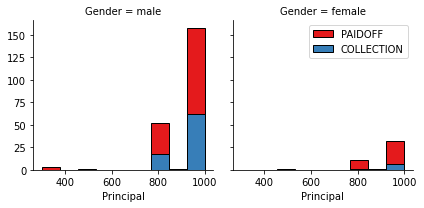

In [18]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

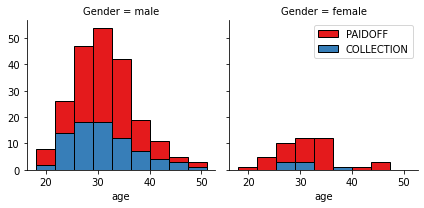

In [19]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

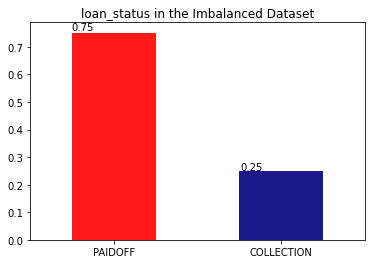

In [20]:
import matplotlib.pyplot as plt
#fig = plt.figure(figsize = (20,5))
ax=df['loan_status'].value_counts(normalize = True).plot(kind='bar', color= ['RED','navy'], alpha = 0.9, rot=0)
plt.title('loan_status in the Imbalanced Dataset')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

In [21]:
df["loan_status"]

0         PAIDOFF
1         PAIDOFF
2         PAIDOFF
3         PAIDOFF
4         PAIDOFF
          ...    
341    COLLECTION
342    COLLECTION
343    COLLECTION
344    COLLECTION
345    COLLECTION
Name: loan_status, Length: 346, dtype: object

In [22]:
df["loan_status"]

0         PAIDOFF
1         PAIDOFF
2         PAIDOFF
3         PAIDOFF
4         PAIDOFF
          ...    
341    COLLECTION
342    COLLECTION
343    COLLECTION
344    COLLECTION
345    COLLECTION
Name: loan_status, Length: 346, dtype: object

In [23]:
from sklearn import preprocessing
LE=preprocessing.LabelEncoder()
df['loan_status']=LE.fit_transform(df['loan_status'])
df['loan_status']

0      1
1      1
2      1
3      1
4      1
      ..
341    0
342    0
343    0
344    0
345    0
Name: loan_status, Length: 346, dtype: int32

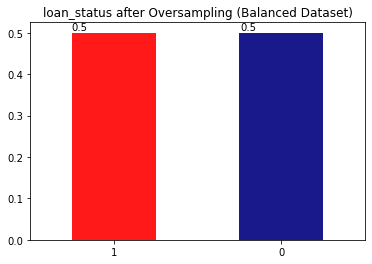

In [24]:
from sklearn.utils import resample
PAIDOFF= df[df['loan_status'] == 0]
COLLECTION= df[df['loan_status'] == 1]
PAIDOFF_oversampled = resample(PAIDOFF, replace=True, n_samples=len(COLLECTION), random_state=0)
df_1 = pd.concat([COLLECTION, PAIDOFF_oversampled])
df_1
ax=df_1.loan_status.value_counts(normalize = True).plot(kind='bar', color= ['RED','navy'], alpha = 0.9, rot=0)
plt.title('loan_status after Oversampling (Balanced Dataset)')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

In [25]:
# df=df_1


# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


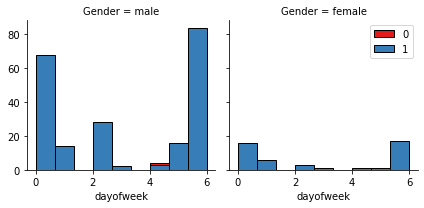

In [26]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [27]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,1,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,1,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,1,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,1,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


<AxesSubplot:xlabel='weekend', ylabel='loan_status'>

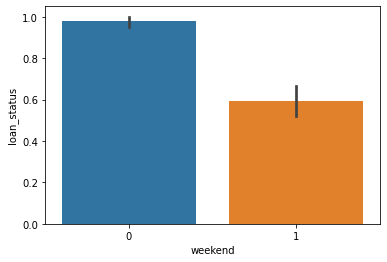

In [28]:
sns.barplot(x='weekend',y='loan_status',data=df)

C:\Users\jyothi swarup\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

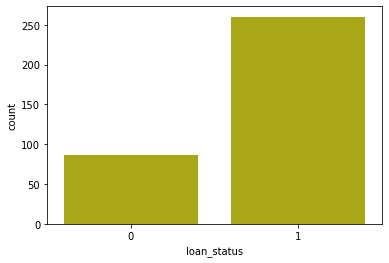

In [29]:
sns.countplot('loan_status',data=df,color="y")

<AxesSubplot:xlabel='loan_status', ylabel='age'>

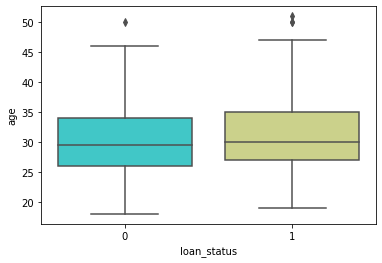

In [30]:
sns.boxplot(x="loan_status", y="age", data=df,palette='rainbow')

<AxesSubplot:>

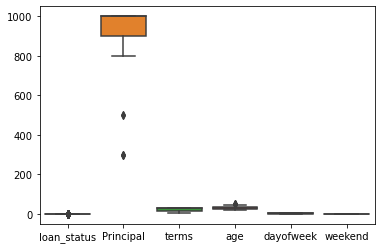

In [31]:
sns.boxplot(data=df,orient='v')

C:\Users\jyothi swarup\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Principal'>

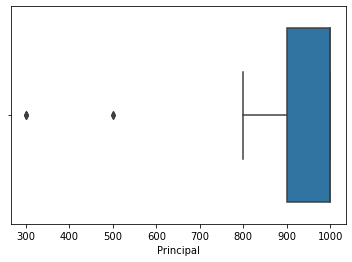

In [32]:
import warnings
sns.boxplot(df['Principal'])

## Convert Categorical features to numerical values


Let's look at gender:


In [33]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  1              0.865385
        0              0.134615
male    1              0.731293
        0              0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [34]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,1,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,1,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,1,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,1,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [35]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              1              0.750000
                      0              0.250000
High School or Below  1              0.741722
                      0              0.258278
Master or Above       0              0.500000
                      1              0.500000
college               1              0.765101
                      0              0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [36]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [37]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['loan_status']=LE.fit_transform(df["loan_status"])

#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [38]:
df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,1,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,1,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,1,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,1,1000,30,2016-09-09,2016-10-08,29,college,0,4,1
...,...,...,...,...,...,...,...,...,...,...
341,0,800,15,2016-09-11,2016-09-25,32,High School or Below,0,6,1
342,0,1000,30,2016-09-11,2016-10-10,25,High School or Below,0,6,1
343,0,800,15,2016-09-12,2016-09-26,39,college,0,0,0
344,0,1000,30,2016-09-12,2016-11-10,28,college,0,0,0


In [39]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [40]:
X = Feature
X.drop("weekend",axis=1)
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [41]:
y = df['loan_status'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [42]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [43]:
X

array([[ 0.51578458,  0.92071769,  2.33152555, ..., -0.38170062,
         1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, ...,  2.61985426,
        -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, ..., -0.38170062,
        -0.87997669,  1.14984679],
       ...,
       [-1.31458942, -0.95911111,  1.33661351, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.81902922, ..., -0.38170062,
        -0.87997669,  1.14984679]])

# Classification



Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [44]:
X[0:10]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769,  0.8391575 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [-1.31458942, -0.95911111, -0.81902922, -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [-5.89052444, -1.96168647

In [45]:
y[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print("Training set is : ",X_train[0:10],y[0:10])
print("Testing set is :",X_test[0:10],y_test[0:10])

Training set is :  [[ 0.51578458 -0.95911111  0.67333883 -0.42056004 -1.20577805 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458  0.92071769 -0.81902922 -0.42056004  0.82934003 -0.38170062
   1.13639374 -0.86968108]
 [ 0.51578458  0.92071769  0.01006414 -0.42056004 -1.20577805 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458 -0.95911111 -0.98484789 -0.42056004  0.82934003 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458  0.92071769 -0.48739188 -0.42056004 -1.20577805 -0.38170062
  -0.87997669  1.14984679]
 [-1.31458942 -0.95911111  1.9998882  -0.42056004  0.82934003 -0.38170062
   1.13639374 -0.86968108]
 [-1.31458942 -0.95911111 -0.48739188 -0.42056004  0.82934003  2.61985426
  -0.87997669 -0.86968108]
 [ 0.51578458 -0.95911111 -0.81902922 -0.42056004  0.82934003 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458  0.92071769 -0.81902922 -0.42056004  0.82934003 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458 -0.95911111  0.67333883 -0.42056004 -1.20577805 -0.3817006

In [47]:
print(X_train.shape)
X_test.shape

(276, 8)


(70, 8)

In [48]:
print(y_train.shape)
y_test.shape

(276,)


(70,)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
error = []
# Calculating error for K values between 1 and 20
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
min(error)

0.21428571428571427

Text(0, 0.5, 'Mean Error')

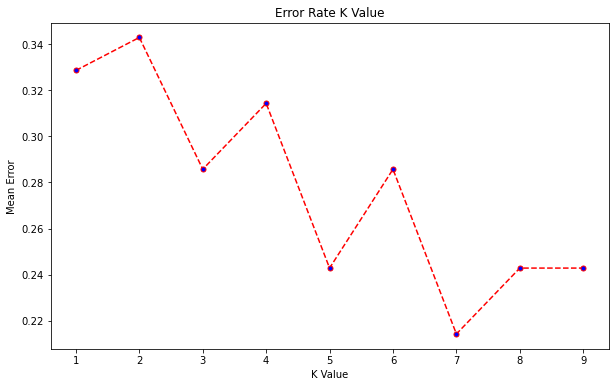

In [50]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [51]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
m=classifier.fit(X_train, y_train)

In [52]:
y_predknn = classifier.predict(X_test)

In [53]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test,y_predknn))

Accuracy:  0.7857142857142857


In [54]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.metrics import f1_score
print(confusion_matrix(y_test, y_predknn))
print(accuracy_score(y_test,y_predknn))
print(precision_score(y_predknn,y_test,average="weighted"))
print(recall_score(y_test,y_predknn,average="weighted"))
print(f1_score(y_test,y_predknn,average="weighted"))
print(classification_report(y_test, y_predknn))

[[ 6  9]
 [ 6 49]]
0.7857142857142857
0.8067532467532467
0.7857142857142857
0.7766540244416351
              precision    recall  f1-score   support

           0       0.50      0.40      0.44        15
           1       0.84      0.89      0.87        55

    accuracy                           0.79        70
   macro avg       0.67      0.65      0.66        70
weighted avg       0.77      0.79      0.78        70



<AxesSubplot:>

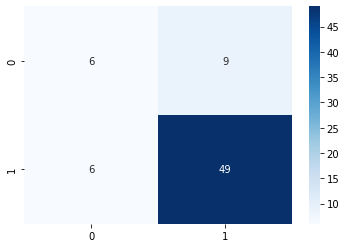

In [55]:
sns.heatmap(confusion_matrix(y_test, y_predknn), annot=True, cmap='Blues')

In [56]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
skfold=StratifiedKFold(n_splits=5)
model=KNeighborsClassifier(n_neighbors=7)
scores=cross_val_score(model,X,y,cv=skfold)
print(np.mean(scores))
scores

0.7226501035196687


array([0.68571429, 0.52173913, 0.7826087 , 0.8115942 , 0.8115942 ])

In [57]:
from sklearn.model_selection import LeaveOneOut
model=KNeighborsClassifier(n_neighbors=7)
leave_validation=LeaveOneOut()
results=cross_val_score(model,X,y,cv=leave_validation)
np.mean(results)

0.7485549132947977

In [58]:
from sklearn.metrics import mean_squared_error,confusion_matrix,roc_auc_score,RocCurveDisplay,auc,roc_curve,ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support,plot_confusion_matrix,log_loss,accuracy_score,f1_score

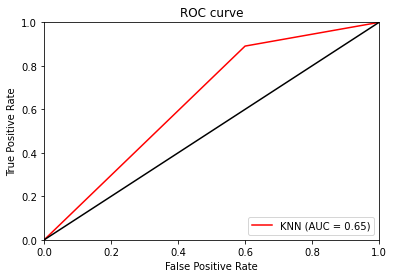

In [59]:
fpr, tpr, thresholds = roc_curve(y_test, y_predknn)
roc_auc = auc(fpr, tpr)
display =RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='KNN')
display.plot(color='r')
plt.plot(list(np.arange(0,2,0.1)),list(np.arange(0,2,0.1)),color='k')
plt.title('ROC curve')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()
plt.show()

# Decision Tree


In [60]:
from sklearn.tree import DecisionTreeClassifier
decisiontree=DecisionTreeClassifier(criterion='entropy', max_depth=6,min_samples_split=2,
    min_samples_leaf=3)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [62]:
decisiontree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3)

In [63]:
y_predtree=decisiontree.predict(X_test)

In [64]:
y_predtree

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [65]:
y_test

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [66]:
print(confusion_matrix(y_test, y_predtree))

[[ 9 14]
 [13 51]]


In [67]:
print(accuracy_score(y_test, y_predtree))

0.6896551724137931


In [68]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_predtree,average="weighted"))

0.6874097834803529


In [69]:
print(precision_score(y_test, y_predtree,average="weighted"))

0.6853387991319027


<AxesSubplot:>

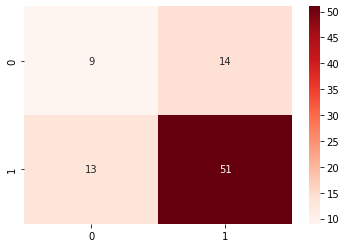

In [70]:
 sns.heatmap(confusion_matrix(y_test, y_predtree), annot=True, cmap='Reds')

In [71]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,y_predtree)

0.6538461538461539

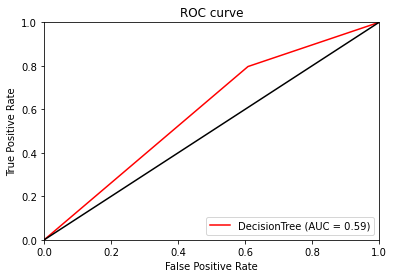

In [72]:
fpr, tpr, thresholds = roc_curve(y_test,y_predtree)
roc_auc = auc(fpr, tpr)
display =RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='DecisionTree')
display.plot(color='r')
plt.plot(list(np.arange(0,2,0.1)),list(np.arange(0,2,0.1)),color='k')
plt.title('ROC curve')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()
plt.show()

# Support Vector Machine


In [73]:
from sklearn import svm
svmmodel=svm.SVC(kernel='rbf')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
svmmodel.fit(X_train,y_train)

SVC()

In [74]:
y_predsvm=svmmodel.predict(X_test)

In [75]:
print(confusion_matrix(y_test, y_predsvm))

[[ 2 10]
 [10 48]]


<AxesSubplot:>

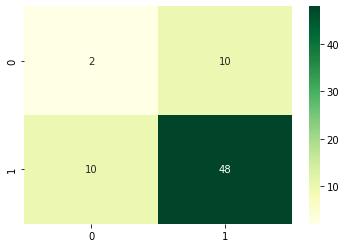

In [76]:
 sns.heatmap(confusion_matrix(y_test, y_predsvm), annot=True, cmap='YlGn')

In [77]:
print(accuracy_score(y_test, y_predsvm))

0.7142857142857143


In [78]:
precision_score(y_predsvm,y_test,average="weighted")

0.7142857142857143

In [79]:
from sklearn.metrics import recall_score
print(recall_score(y_test,y_predsvm,average="weighted"))

0.7142857142857143


In [80]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_predsvm,average="weighted"))

0.7142857142857143


In [81]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,y_predsvm)

0.7058823529411765

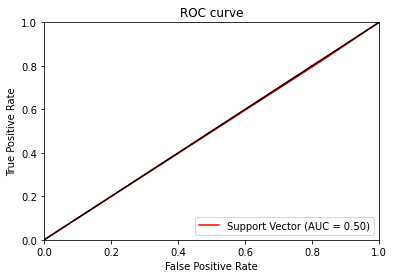

In [82]:
fpr, tpr, thresholds = roc_curve(y_test,y_predsvm)
roc_auc = auc(fpr, tpr)
display =RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='Support Vector')
display.plot(color='r')
plt.plot(list(np.arange(0,2,0.1)),list(np.arange(0,2,0.1)),color='k')
plt.title('ROC curve')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()
plt.show()

# Logistic Regression


In [83]:
from sklearn.linear_model import LogisticRegression
logis=LogisticRegression(C=0.01, solver='liblinear')

In [84]:
logis.fit(X_train,y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [85]:
y_predlog=logis.predict(X_test)

In [86]:
y_predlog[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [87]:
print(confusion_matrix(y_test, y_predlog))

[[ 1 11]
 [ 3 55]]


In [88]:
print (classification_report(y_test,y_predlog))

              precision    recall  f1-score   support

           0       0.25      0.08      0.12        12
           1       0.83      0.95      0.89        58

    accuracy                           0.80        70
   macro avg       0.54      0.52      0.51        70
weighted avg       0.73      0.80      0.76        70



<AxesSubplot:>

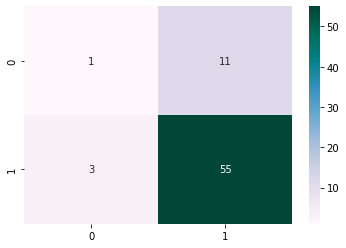

In [89]:
 sns.heatmap(confusion_matrix(y_test, y_predlog), annot=True, cmap='PuBuGn')

In [90]:
accuracy_score(y_predlog,y_test)

0.8

In [91]:
precision_score(y_predlog,y_test,average="weighted")

0.8988505747126437

In [92]:
from sklearn.metrics import recall_score
print(recall_score(y_test,y_predlog,average="weighted"))

0.8


In [93]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_predlog,average="weighted"))

0.7564516129032258


In [94]:
jaccard_score(y_test, y_predlog)

0.7971014492753623

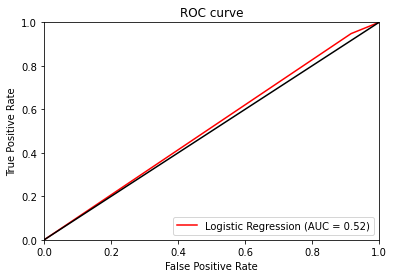

In [95]:
fpr, tpr, thresholds = roc_curve(y_test,y_predlog)
roc_auc = auc(fpr, tpr)
display =RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='Logistic Regression')
display.plot(color='r')
plt.plot(list(np.arange(0,2,0.1)),list(np.arange(0,2,0.1)),color='k')
plt.title('ROC curve')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()
plt.show()

# RANDOM FOREST CLASSIFIER

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

In [98]:
model_rf= RandomForestClassifier(max_depth=10,min_samples_leaf=3,min_samples_split=5,n_estimators=100)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=5)

In [99]:
ypreds_rf=model_rf.predict(X_test)
ypreds_rf

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1],
      dtype=int64)

In [100]:
model_rf.score(X_test,y_test)

0.7241379310344828

In [101]:
f2=f1_score(y_test,model_rf.predict(X_test))
lgls=log_loss(y_test, model_rf.predict_proba(X_test))
acc=accuracy_score(y_test, model_rf.predict(X_test))
rac=roc_auc_score(y_test, model_rf.predict(X_test))
f2,lgls,rac,acc

(0.8333333333333333,
 0.4372075853718136,
 0.5181017612524461,
 0.7241379310344828)

# Model Evaluation using Test set


In [102]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [103]:
# !wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

### Load Test set for evaluation


In [105]:
test_df = pd.read_csv(r"loan_test.csv.xls")
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [106]:
LE=LabelEncoder()
test_df['loan_status']=LE.fit_transform(test_df['loan_status'])

In [107]:
test_df.shape

(54, 10)

In [108]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
test_X = preprocessing.StandardScaler().fit(test_Feature).transform(test_Feature)

test_X[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

In [109]:
test_y = test_df['loan_status'].values

# KNN Evaluation


In [110]:
test_yhat=classifier.predict(test_X)

In [111]:
KNN_f1_score = f1_score(test_y, test_yhat, average='weighted') 
print("KNN_f1_score  = " ,KNN_f1_score)
KNN_Jaccard = jaccard_score(test_y, test_yhat)
print("KNN - jaccard accuracy = " , KNN_Jaccard)

KNN_f1_score  =  0.6328400281888654
KNN - jaccard accuracy =  0.6538461538461539


# Decision Tree Evaluation

In [112]:
test_yhat =decisiontree.predict(test_X)
DTree_Jaccard = jaccard_score(test_y, test_yhat)
print("Decision Tree - jaccard accuracy = " , DTree_Jaccard)
DTree_f1_score = f1_score(test_y, test_yhat, average='weighted') 
print("Decision Tree - f1 score accuracy = " , DTree_f1_score)

Decision Tree - jaccard accuracy =  0.7608695652173914
Decision Tree - f1 score accuracy =  0.7937814357567445


# SVM Evaluation

In [113]:
test_yhat = svmmodel.predict(test_X)
SVM_Jaccard = jaccard_score(test_y,test_yhat)
print("Support Vector Machine - jaccard accuracy = " , SVM_Jaccard)
SVM_f1_score = f1_score(test_y, test_yhat, average='weighted') 
print("Support Vector Machine - f1 score accuracy = " , SVM_f1_score)

Support Vector Machine - jaccard accuracy =  0.72
Support Vector Machine - f1 score accuracy =  0.7144311330357843


# Logistic Regression Evaluation

In [114]:
test_yhat = logis.predict(test_X)
test_yhat_prob = logis.predict_proba(test_X)
LGR_Jaccard = jaccard_score(test_y, test_yhat)
print("Logistic Regression - jaccard accuracy = " , LGR_Jaccard)
LGR_f1_score = f1_score(test_y, test_yhat, average='weighted') 
print("Logistic Regression - f1 score accuracy = " , LGR_f1_score)
LGR_log_loss = log_loss(test_y, test_yhat_prob)
print("Logistic Regression - log loss = " , LGR_log_loss)

Logistic Regression - jaccard accuracy =  0.7407407407407407
Logistic Regression - f1 score accuracy =  0.6304176516942475
Logistic Regression - log loss =  0.5766315963621911


In [115]:
algorithm_list = ['KNN', 'Decision Tree', 'SVM', 'LoisticRegression']
Jaccard_list = [KNN_Jaccard, DTree_Jaccard, SVM_Jaccard, LGR_Jaccard]
F1_score_list = [KNN_f1_score, DTree_f1_score, SVM_f1_score, LGR_f1_score]
LogLoss_list = ['NA', 'NA', 'NA', LGR_log_loss]
df = pd.DataFrame(list(zip(algorithm_list, Jaccard_list, F1_score_list, LogLoss_list)),
              columns=['Algorithm','Jaccard', 'F1-score', 'LogLoss'])
df.set_index('Algorithm', inplace = True)
df

,Jaccard,F1-score,LogLoss
Algorithm,,,
KNN,0.653846,0.632840,NA
Decision Tree,0.760870,0.793781,NA
SVM,0.720000,0.714431,NA
LoisticRegression,0.740741,0.630418,0.576632
